In [1]:
# Custom functions and variables
import sys
sys.path.append('./scripts') # Location of modules
from hmmsearch_utils import * 

# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style='ticks',palette='Set2') # Tufte and Brewer style
#sns.despine()
font = {'family' : 'Arial', 'weight' : 'light','size'   : 10,}
plt.rc('font', **font)
plt.rcParams['text.color'] = 'black'
plt.rcParams['svg.fonttype'] = 'none' # Editable SVG text

%matplotlib inline

In [2]:
#### USER INPUT REQUIRED
# Names of each sample
samples = ['Inoculum','1%NaCl','3%NaCl','5%NaCl','7%NaCl']

# Each sample should have coverage and irep data for each genome in the below table
# Column names must match the programmatic assignment below
table = pd.read_csv('./data/genome-data.csv')
table = table.set_index('MAG ID')
genomes = table.index.tolist()

# Programmatic assignment of irep and cov names
irep_cols = ['irep_' + i for i in samples]
coverage_cols = ['cov_' + i for i in samples] 
# Check columns
for i in irep_cols + coverage_cols:
    if i not in table.columns.tolist():
        print('ERROR: Column %s not present' % i)

table



,MAG,Size (Mbp),Scaffolds (#),Compl. (%),Contam. (%),Strain Var. (%),GC (%),CDS,cov_Sum,cov_Max,cov_1%NaCl,cov_3%NaCl,cov_5%NaCl,cov_7%NaCl,cov_Inoculum,irep_1%NaCl,irep_3%NaCl,irep_5%NaCl,irep_7%NaCl,irep_Inoculum
MAG ID,,,,,,,,,,,,,,,,,,,,
BM001,BM001 Alphaproteobacteria,1.13,10,97.85,0.00,0.00,42.8,1175,27.9,25.0,0.6,0.5,0.7,1.1,25.0,NaN,NaN,NaN,NaN,1.143634
BM002,BM002 Desulfobacteraceae,3.80,638,94.35,3.25,33.33,50.0,3595,10.9,9.4,0.1,0.2,0.4,0.8,9.4,NaN,NaN,NaN,NaN,1.314611
BM003,BM003 Chromatiales,3.62,337,93.35,5.53,25.93,60.6,3404,15.2,6.6,2.1,2.5,2.0,2.0,6.6,NaN,NaN,NaN,NaN,1.375391
BM004,BM004 Desulfobulbaceae,2.66,189,98.13,1.64,25.00,47.5,2487,12.3,6.1,0.9,1.7,1.7,1.9,6.1,NaN,NaN,NaN,NaN,1.392306
BM005,BM005 Desulfobacteraceae,3.05,577,84.52,1.81,0.00,43.3,2788,9.1,5.1,0.5,1.2,1.4,0.9,5.1,NaN,NaN,NaN,NaN,NaN
BM101,BM101 Azoarcus,4.90,160,98.86,3.63,20.00,62.9,4690,514.5,513.8,513.8,0.1,0.2,0.2,0.2,1.294608,NaN,NaN,NaN,NaN
BM102,BM102 Arcobacter,3.48,42,98.78,1.56,0.00,28.1,3530,48.6,48.5,48.5,0.1,0.0,0.0,0.0,1.427262,NaN,NaN,NaN,NaN
BM103,BM103 Desulfuromonas,2.93,426,90.07,6.13,7.69,55.9,2860,8.8,3.6,3.6,2.3,1.8,1.0,0.1,NaN,NaN,NaN,NaN,NaN
BM301,BM301 Sedimenticola,4.26,31,98.72,1.46,0.00,56.4,4076,675.1,674.1,0.2,674.1,0.2,0.3,0.3,NaN,NaN,NaN,NaN,NaN


### Functional annotation with custom HMMs

In [3]:
# Presence and absence of genes, based on HMMs
hmm_directory = './data/hmms/'
genome_directory = './data/genomes/'
hmmdf = hmmsearch_ea_genome(hmm_directory, genome_directory)
hmms = hmmdf.columns.tolist()

# Merge annotation with other genome information
df = pd.merge(table,hmmdf,left_index=True,right_index=True, how='outer')
df = df.sort_values(by='MAG ID',ascending=False)

hmmdf


 Searching 48 genomes with HMMs.... 

HMM 	 Threshold score 	 N genomes
ccld 	 125 	 1
clrA1 	 1500 	 0
clrA2 	 2000 	 1
pcld 	 150 	 9
pcrA1 	 800 	 7
pcrA2 	 1000 	 2

 Search completed.


,ccld,clrA1,clrA2,pcld,pcrA1,pcrA2
Genome,,,,,,
BM001,0,0,0,0,0,0
BM002,0,0,0,0,0,0
BM003,0,0,0,0,0,0
BM004,0,0,0,0,0,0
BM005,0,0,0,0,0,0
BM101,1,0,1,1,0,0
BM102,0,0,0,1,1,0
BM103,0,0,0,0,0,0
BM301,0,0,0,1,1,0


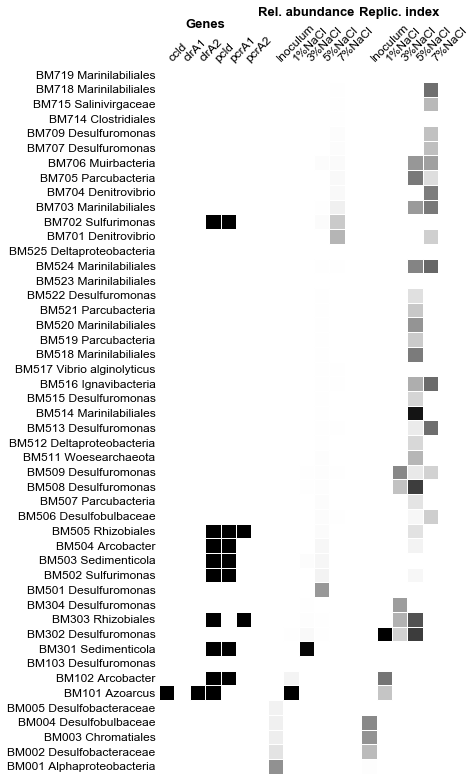

In [4]:
df = df.loc[genomes,:]

h_dimensions = [len(hmms),len(coverage_cols),len(irep_cols)]
fig, axes = plt.subplots(1, 3, figsize=(5,13), 
                               gridspec_kw = {'width_ratios':h_dimensions})

title_format = {'fontweight':'bold', 'fontsize':'13', 'horizontalalignment':'center'}
label_format = {'color':'black', 'fontsize':12}

# Subplot: Gene presence/absence from hmmsearch
ax=axes[0]
ax.set_title('Genes',**title_format)
data = df.loc[:,hmms]
ax.pcolor(data, cmap='Greys', linewidths=1, edgecolor='white', snap=True)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticklabels(df['MAG'].tolist(),**label_format)
ax.set_xticklabels(hmms,**label_format)

# Subplot: Relative abundance (coverage of ea genome / sum coverage of all genomes)
ax=axes[1]
ax.set_title('Rel. abundance',**title_format)
data = df.loc[:,coverage_cols]/df.loc[:,coverage_cols].sum()
ax.pcolor(data,cmap='Greys', linewidths=1, edgecolor='white', snap=True)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# Subplot: iRep, index of replication
ax=axes[2]
ax.set_title('Replic. index',**title_format)
data = df.loc[:,irep_cols]
ax.pcolor(data,cmap='Greys', linewidths=1, edgecolor='white', snap=True, facecolor=None)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    
for ax in axes:
    ax.tick_params(axis=u'both', which=u'both',length=0) # No tick markers
    ax.set_ylabel(None) # No ylabel
    ax.xaxis.tick_top() # xticklabels on top
    ax.xaxis.set_label_position('top')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45,  ha='left') # Rotate x labels
    for position in ['top','bottom','left','right']:
        ax.spines[position].set_visible(False) # Remove border


for ax in axes[1:]:
    ax.set_yticklabels(['']*len(df.index))
    ax.set_xticklabels(samples,**label_format)
    

fig.align_xlabels(axes)
plt.savefig('./data/community-summary.png') # PNG, not editable
plt.savefig('./data/community-summary.svg') # SVG, editable in InkScape, etc.
plt.show()

### Bonus example: clustering genes by co-occurrence

A particularly useful example for heatmaps is clustering the data so it becomes more interpretable. Here, I cluster genes and genomes by the presence/absence of genes in genomes. Clustering can be directed on both the x and y dimensions, and column order can easily be changed in pandas from the default alphabetical to the new list order.



In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

# Cluster data by, for example, HMM presence/absence

# Cluster HMMS and get dendogram leaves (order of HMMs)
data = df.loc[:,hmms].copy()
X = np.array(data.transpose())
Z = linkage(X, method='average')
leaves = leaves_list(Z) 
new_x = [hmms[i] for i in leaves]

# Cluster genomes and get dendogram leaves (order of genomes)
X = np.array(data)
Z = linkage(X, method='average') 
leaves = leaves_list(Z) 
new_y = [genomes[i] for i in leaves]

print('HMMs clustered by HMM presence/absence:')
print(new_x)
print('\n', 'MAGs clustered by HMM presence/absence:')
print(new_y)


HMMs clustered by HMM presence/absence:
['pcld', 'pcrA1', 'pcrA2', 'clrA1', 'ccld', 'clrA2']

 MAGs clustered by HMM presence/absence:
['BM101', 'BM719', 'BM718', 'BM715', 'BM714', 'BM709', 'BM707', 'BM706', 'BM705', 'BM704', 'BM703', 'BM701', 'BM525', 'BM524', 'BM523', 'BM522', 'BM521', 'BM520', 'BM519', 'BM518', 'BM517', 'BM516', 'BM515', 'BM514', 'BM513', 'BM512', 'BM511', 'BM509', 'BM508', 'BM507', 'BM506', 'BM501', 'BM304', 'BM302', 'BM103', 'BM005', 'BM004', 'BM003', 'BM001', 'BM002', 'BM702', 'BM504', 'BM503', 'BM502', 'BM102', 'BM301', 'BM303', 'BM505']


#### Re-plot

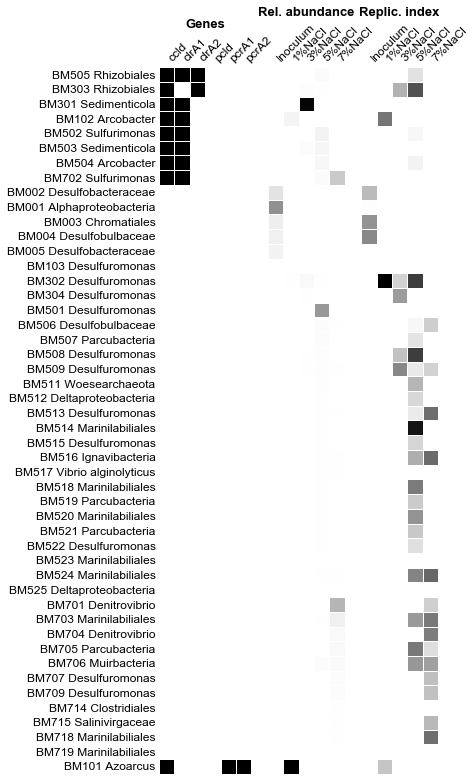

In [6]:
df = df.loc[new_y,:]

h_dimensions = [len(hmms),len(coverage_cols),len(irep_cols)]
fig, axes = plt.subplots(1, 3, figsize=(5,13), 
                               gridspec_kw = {'width_ratios':h_dimensions})

title_format = {'fontweight':'bold', 'fontsize':'13', 'horizontalalignment':'center'}
label_format = {'color':'black', 'fontsize':12}

# Subplot: Gene presence/absence from hmmsearch
ax=axes[0]
ax.set_title('Genes',**title_format)
data = df.loc[:,new_x]
ax.pcolor(data, cmap='Greys', linewidths=1, edgecolor='white', snap=True)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticklabels(df['MAG'].tolist(),**label_format)
ax.set_xticklabels(hmms,**label_format)

# Subplot: Relative abundance (coverage of ea genome / sum coverage of all genomes)
ax=axes[1]
ax.set_title('Rel. abundance',**title_format)
data = df.loc[:,coverage_cols]/df.loc[:,coverage_cols].sum()
ax.pcolor(data,cmap='Greys', linewidths=1, edgecolor='white', snap=True)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# Subplot: iRep, index of replication
ax=axes[2]
ax.set_title('Replic. index',**title_format)
data = df.loc[:,irep_cols]
ax.pcolor(data,cmap='Greys', linewidths=1, edgecolor='white', snap=True, facecolor=None)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    
for ax in axes:
    ax.tick_params(axis=u'both', which=u'both',length=0) # No tick markers
    ax.set_ylabel(None) # No ylabel
    ax.xaxis.tick_top() # xticklabels on top
    ax.xaxis.set_label_position('top')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45,  ha='left') # Rotate x labels
    for position in ['top','bottom','left','right']:
        ax.spines[position].set_visible(False) # Remove border


for ax in axes[1:]:
    ax.set_yticklabels(['']*len(df.index))
    ax.set_xticklabels(samples,**label_format)
    

fig.align_xlabels(axes)
plt.savefig('./data/community-summary.png') # PNG, not editable
plt.savefig('./data/community-summary.svg') # SVG, editable in InkScape, etc.
plt.show()